In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from reader import TCXReader
import datetime
pd.set_option('mode.chained_assignment', None)

### Note:

This will not run without putting your own files in a ./runs_tcx directory. It's purpose here is just to show some sample output.

In [ ]:
%%time
readers = []
lap_dfs = []
tp_dfs = []

for d in glob.glob('./runs_tcx/*.tcx'):
    print(f'File {d}')
    reader = TCXReader(d, 'run')
    readers.append(reader)
    lap_dfs.append(reader.lap_df)
    tp_dfs.append(reader.trackpoint_df)

In [ ]:
lap_df = pd.concat(lap_dfs)
tp_df = pd.concat(tp_dfs)

In [4]:
lap_df

,StartTime,TotalTimeSeconds,DistanceMeters,MaximumSpeed,Calories,AverageHeartRateBpm,MaximumHeartRateBpm,Intensity,TriggerMethod,AvgSpeed,AvgRunCadence,MaxRunCadence,AvgWatts,MaxWatts,Pace,StrideLength
0,2023-12-23T09:32:14.000,218.089,1000.10,4.880,61,165,183,Active,Manual,4.586,172,202,None,None,3.634249,1.599767
1,2023-12-23T09:35:53.000,229.132,1000.10,4.684,75,185,191,Active,Manual,4.365,178,184,None,None,3.818251,1.471348
2,2023-12-23T09:39:42.000,237.960,1000.10,4.301,81,189,192,Active,Manual,4.203,176,180,None,None,3.965421,1.432841
3,2023-12-23T09:43:40.000,236.018,1000.10,4.423,83,191,195,Active,Manual,4.237,176,182,None,None,3.933601,1.444432
4,2023-12-23T09:47:36.000,250.905,1000.10,4.217,88,191,197,Active,Manual,3.986,174,180,None,None,4.181301,1.374483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,2024-10-13T11:17:27.000,277.835,1000.00,3.751,71,162,167,Active,Manual,3.599,174,188,375,417,4.630916,1.241034
19,2024-10-13T11:22:05.000,276.581,1000.00,3.704,71,163,166,Active,Manual,3.616,180,184,374,417,4.609145,1.205333
20,2024-10-13T11:26:42.000,278.864,1000.00,3.947,71,163,166,Active,Manual,3.586,180,186,376,420,4.647704,1.195333
21,2024-10-13T11:31:20.000,280.413,1000.00,3.639,72,165,169,Active,Manual,3.566,180,186,376,441,4.673771,1.188667


In [6]:
tp_df

,Time,DistanceMeters,HeartRateBpm,Speed,RunCadence,LatitudeDegrees,LongitudeDegrees,AltitudeMeters,Watts,Pace,StrideLength
0,2023-12-23T09:32:14.000Z,1.200000,109,0.000,0,53.343729,-6.444765,53.599998,NaN,inf,NaN
1,2023-12-23T09:32:15.000Z,2.850000,112,0.000,0,53.343723,-6.444788,53.599998,NaN,inf,NaN
2,2023-12-23T09:32:17.000Z,9.300000,109,0.308,0,53.343688,-6.444865,53.400002,NaN,54.112554,inf
3,2023-12-23T09:32:18.000Z,14.190000,112,0.476,0,53.343659,-6.444921,53.400002,NaN,35.014005,inf
4,2023-12-23T09:32:22.000Z,35.610001,112,4.712,98,53.343519,-6.445138,53.000000,NaN,3.537069,2.884898
...,...,...,...,...,...,...,...,...,...,...,...
7027,2024-10-13T11:39:22.000Z,22590.759766,147,2.771,168,53.346365,-6.307646,7.400000,291.0,6.014676,0.989643
7028,2024-10-13T11:39:23.000Z,22594.169922,147,2.771,168,53.346366,-6.307690,7.400000,291.0,6.014676,0.989643
7029,2024-10-13T11:39:24.000Z,22596.099609,147,2.771,168,53.346368,-6.307718,7.200000,291.0,6.014676,0.989643
7030,2024-10-13T11:39:25.000Z,22597.859375,147,2.771,166,53.346375,-6.307740,7.400000,292.0,6.014676,1.001566


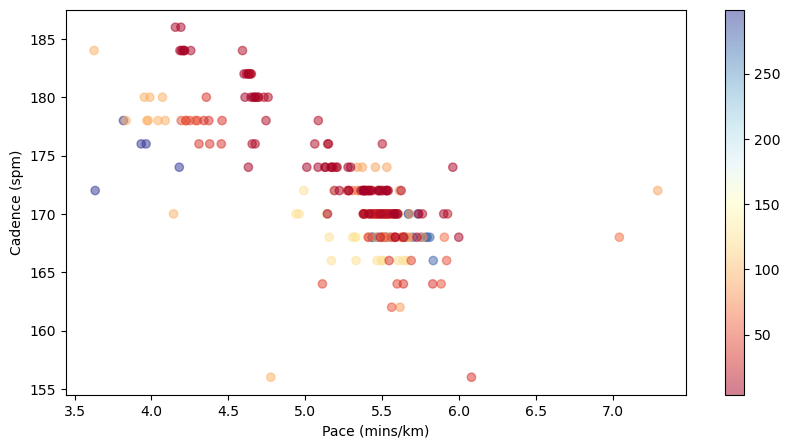

In [7]:
fig, ax = plt.subplots(figsize = (10,5))
plot_df = lap_df.loc[lap_df.AvgRunCadence>100]
plot_df['date'] = pd.to_datetime(plot_df.StartTime)
plot_df['days_ago'] = (datetime.datetime.today()-plot_df.loc[:,'date']).dt.days
scatter = ax.scatter(plot_df.Pace, plot_df.AvgRunCadence, c =plot_df.days_ago, cmap = 'RdYlBu', alpha = 0.5)
ax.set_xlabel('Pace (mins/km)')
ax.set_ylabel('Cadence (spm)')
plt.colorbar(scatter)

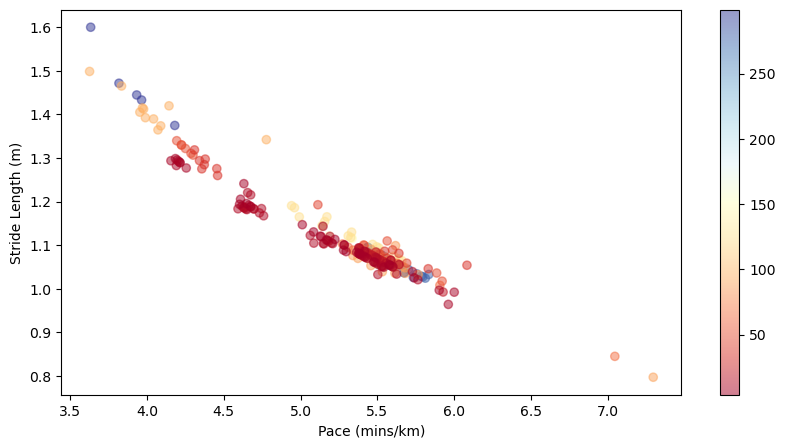

In [8]:
fig, ax = plt.subplots(figsize = (10,5))
plot_df = lap_df.loc[lap_df.AvgRunCadence>100]
plot_df['date'] = pd.to_datetime(plot_df.StartTime)
plot_df['days_ago'] = (datetime.datetime.today()-plot_df['date']).dt.days
scatter = ax.scatter(plot_df.Pace, plot_df.StrideLength, c =plot_df.days_ago, cmap = 'RdYlBu', alpha = 0.5)
ax.set_xlabel('Pace (mins/km)')
ax.set_ylabel('Stride Length (m)')
plt.colorbar(scatter)

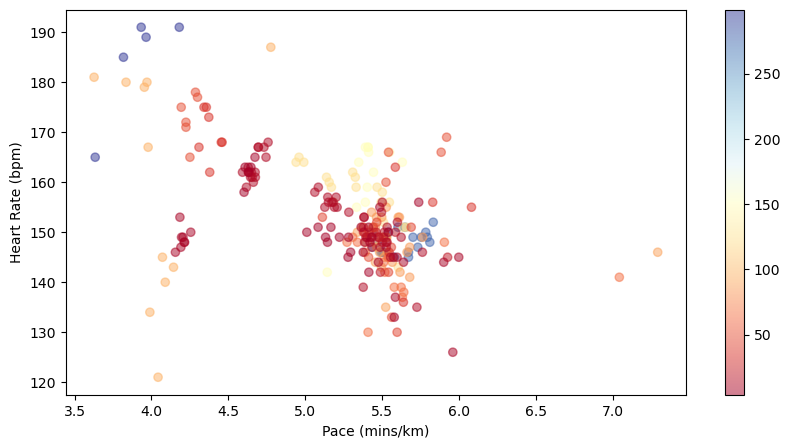

In [9]:
fig, ax = plt.subplots(figsize = (10,5))
plot_df = lap_df.loc[lap_df.AvgRunCadence>100]
plot_df['date'] = pd.to_datetime(plot_df.StartTime)
plot_df['days_ago'] = (datetime.datetime.today()-plot_df['date']).dt.days
scatter = ax.scatter(plot_df.Pace, plot_df.AverageHeartRateBpm, c =plot_df.days_ago, cmap = 'RdYlBu', alpha = 0.5)
ax.set_xlabel('Pace (mins/km)')
ax.set_ylabel('Heart Rate (bpm)')
plt.colorbar(scatter)

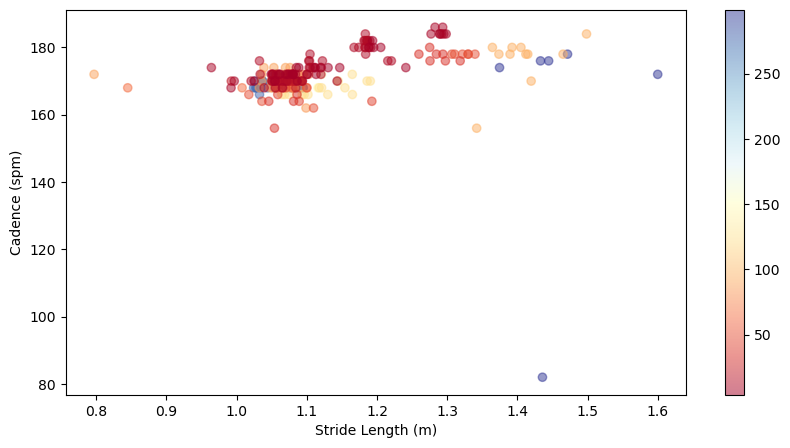

In [10]:
fig, ax = plt.subplots(figsize = (10,5))
plot_df = lap_df
plot_df['date'] = pd.to_datetime(plot_df.StartTime)
plot_df['days_ago'] = (datetime.datetime.today()-plot_df['date']).dt.days
scatter = ax.scatter(plot_df.StrideLength, plot_df.AvgRunCadence, c =plot_df.days_ago, cmap = 'RdYlBu', alpha = 0.5)
ax.set_xlabel('Stride Length (m)')
ax.set_ylabel('Cadence (spm)')
plt.colorbar(scatter)

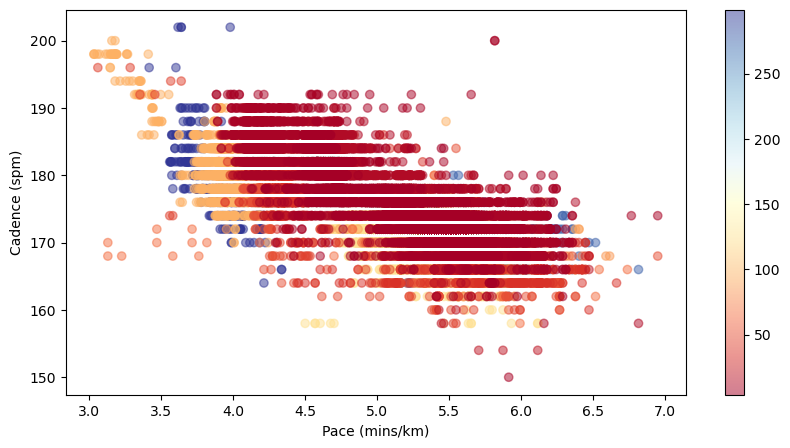

In [11]:
fig, ax = plt.subplots(figsize = (10,5))
plot_df = tp_df[(tp_df.RunCadence>130)&(tp_df.Pace.between(3, 7))]
plot_df['date'] = pd.to_datetime(plot_df.Time.astype(str).str.slice(0,-1))
plot_df['days_ago'] = (datetime.datetime.today()-plot_df['date']).dt.days
scatter = ax.scatter(plot_df.Pace, plot_df.RunCadence, c =plot_df.days_ago, cmap = 'RdYlBu', alpha = 0.5)
ax.set_xlabel('Pace (mins/km)')
ax.set_ylabel('Cadence (spm)')
plt.colorbar(scatter)

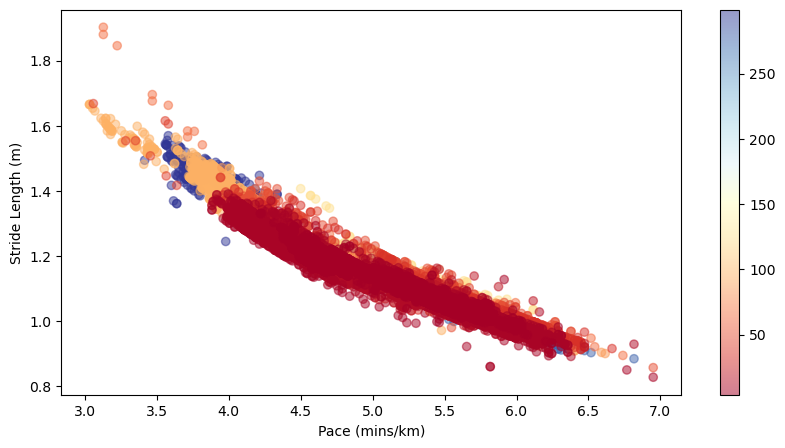

In [12]:
fig, ax = plt.subplots(figsize = (10,5))
plot_df = tp_df[(tp_df.RunCadence>130)&(tp_df.Pace.between(3, 7))]
plot_df['date'] = pd.to_datetime(plot_df.Time.astype(str).str.slice(0,-1))
plot_df['days_ago'] = (datetime.datetime.today()-plot_df['date']).dt.days
scatter = ax.scatter(plot_df.Pace, plot_df.StrideLength, c =plot_df.days_ago, cmap = 'RdYlBu', alpha = 0.5)
ax.set_xlabel('Pace (mins/km)')
ax.set_ylabel('Stride Length (m)')
plt.colorbar(scatter)